In [1]:
import matplotlib.pyplot as plt
import networkx as nx

class House:
    def __init__(self, house_id):
        self.house_id = house_id

    def __repr__(self):
        return f"House({self.house_id})"


In [2]:
class Agent:
    def __init__(self, agent_id, initial_house, preferences):
        self.agent_id = agent_id
        self.current_house = initial_house
        self.preferences = preferences
        self.final_house = None

    def top_choice(self, available_houses):
        """Returns the top available choice from the agent's preference list."""
        for house in self.preferences:
            if house in available_houses:
                return house
        return None

    def __repr__(self):
        return f"Agent({self.agent_id}, {self.current_house})"


In [3]:
def initialize_agents_and_houses():
    # Define a larger set of houses and agents with more complex preferences
    houses = [House(i) for i in range(1, 7)]
    agents = [
        Agent(1, houses[0], [houses[1], houses[2], houses[3], houses[0], houses[4], houses[5]]),
        Agent(2, houses[1], [houses[2], houses[3], houses[0], houses[5], houses[1], houses[4]]),
        Agent(3, houses[2], [houses[3], houses[0], houses[1], houses[5], houses[4], houses[2]]),
        Agent(4, houses[3], [houses[4], houses[1], houses[5], houses[0], houses[2], houses[3]]),
        Agent(5, houses[4], [houses[5], houses[3], houses[2], houses[1], houses[0], houses[4]]),
        Agent(6, houses[5], [houses[0], houses[4], houses[3], houses[2], houses[1], houses[5]]),
    ]
    return agents, houses

agents, houses = initialize_agents_and_houses()
print("Agents and Houses Initialized:")
for agent in agents:
    print(f"Agent {agent.agent_id} starts with {agent.current_house} and prefers {agent.preferences}")


Agents and Houses Initialized:
Agent 1 starts with House(1) and prefers [House(2), House(3), House(4), House(1), House(5), House(6)]
Agent 2 starts with House(2) and prefers [House(3), House(4), House(1), House(6), House(2), House(5)]
Agent 3 starts with House(3) and prefers [House(4), House(1), House(2), House(6), House(5), House(3)]
Agent 4 starts with House(4) and prefers [House(5), House(2), House(6), House(1), House(3), House(4)]
Agent 5 starts with House(5) and prefers [House(6), House(4), House(3), House(2), House(1), House(5)]
Agent 6 starts with House(6) and prefers [House(1), House(5), House(4), House(3), House(2), House(6)]


In [4]:
def build_top_choice_graph(agents, available_houses):
    graph = {}
    for agent in agents:
        if agent.final_house is None:
            top_choice = agent.top_choice(available_houses)
            if top_choice:
                for target_agent in agents:
                    if target_agent.current_house == top_choice:
                        graph[agent] = target_agent
                        break
    return graph


In [5]:
def find_cycles(graph):
    visited = set()
    cycles = []

    def visit(agent, path):
        if agent in path:
            cycle_start = path.index(agent)
            cycles.append(path[cycle_start:])
            return
        if agent in visited:
            return
        visited.add(agent)
        path.append(agent)
        if agent in graph:
            visit(graph[agent], path)
        path.pop()

    for agent in graph:
        visit(agent, [])

    return cycles


In [6]:
def perform_trades(cycles):
    for cycle in cycles:
        for agent in cycle:
            agent.final_house = agent.current_house
            agent.current_house = None
        for i, agent in enumerate(cycle):
            next_agent = cycle[(i + 1) % len(cycle)]
            agent.current_house = next_agent.final_house


In [8]:
def visualize_final_assignments(agents):
    G = nx.DiGraph()
    edges = []

    for agent in agents:
        G.add_node(f"Agent {agent.agent_id}", label=f"Agent {agent.agent_id}")
        if agent.final_house:
            house = agent.final_house.house_id
            G.add_edge(f"Agent {agent.agent_id}", f"House {house}")
            edges.append((f"Agent {agent.agent_id}", f"House {house}"))

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="red", arrows=True)
    plt.title("Final House Assignment Graph")
    plt.show()

Agent 1 ends up with House(1)
Agent 2 ends up with House(2)
Agent 3 ends up with House(3)
Agent 4 ends up with House(4)
Agent 5 ends up with House(5)
Agent 6 ends up with House(6)


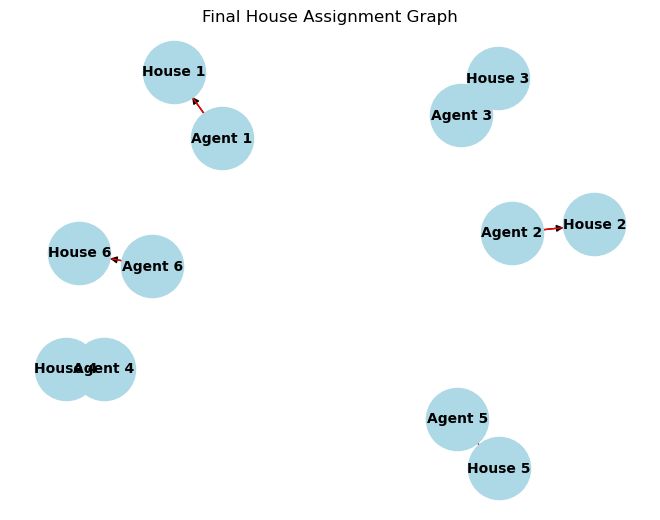

In [9]:
def top_trading_cycle_algorithm(agents):
    available_houses = {agent.current_house for agent in agents}

    while any(agent.final_house is None for agent in agents):
        graph = build_top_choice_graph(agents, available_houses)
        cycles = find_cycles(graph)
        perform_trades(cycles)
        available_houses = {agent.current_house for agent in agents if agent.current_house}

    # Display the results
    for agent in agents:
        print(f"Agent {agent.agent_id} ends up with {agent.final_house}")

    # Visualize the final assignments
    visualize_final_assignments(agents)

top_trading_cycle_algorithm(agents)
